<a href="https://colab.research.google.com/github/hoonzi-s/EDRC_Python/blob/main/02.%20Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# LinearRegression in scikit-learn

In [50]:
data = np.array([[1, 3],
				[2, 3.2],
				[2.3, 4],
				[3.2, 5],
				[3.3, 5.3],
				[4, 6],
				[4.5, 6.8],
				[4.8, 7.1],
				[4.9, 7.2],
				[6.2, 9.3],
				[7, 10.1],
				[7.1, 10.9],
				[8.8, 14.1],
				[9.5, 16.0],
				[10, 17]])

x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)
print(lr.coef_)
print(lr.intercept_)

[[1.5948928]]
[-0.02390494]


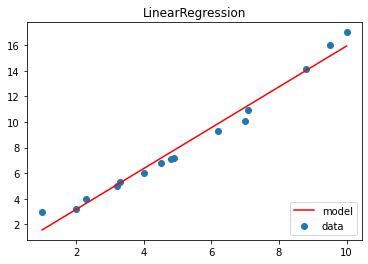

In [57]:
plt.figure()
plt.scatter(x, y, label = 'data')
plt.plot(x, lr.coef_ * x + lr.intercept_, 'r', label = 'model')
plt.title('LinearRegression')
plt.legend(loc = 'lower right')
plt.show()

# LogisticRegression in scikit-learn

In [66]:
data = np.array([[1, 0],
		        [2, 0],
		        [3, 0],
		        [4, 0],
		        [5, 1],
		        [6, 1],
		        [7, 1],
		        [8, 1],
		        [9, 1],
		        [10, 1]])
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [75]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x, y)
a = logistic.coef_
b = logistic.intercept_
z = a * x + b
z

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-4.12613444],
       [-2.94505883],
       [-1.76398321],
       [-0.58290759],
       [ 0.59816802],
       [ 1.77924364],
       [ 2.96031926],
       [ 4.14139487],
       [ 5.32247049],
       [ 6.50354611]])

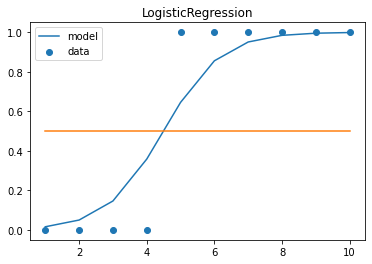

In [87]:
from scipy.special import expit
plt.figure()
plt.scatter(x, y, label = 'data')
plt.plot(x, expit(z), label = 'model')
plt.plot(x, x / x * 0.5)
plt.legend()
plt.title('LogisticRegression')
plt.show()

In [80]:
logistic.score(x, y)

1.0

# Tensorflow

In [88]:
import tensorflow as tf

In [89]:
# 상수 지정
con1 = tf.constant(10)
con2 = tf.constant(20)

In [93]:
# 상수 연산
result1 = tf.add(con1, con2)
result1.numpy()

30

In [94]:
result2 = tf.subtract(con1, con2)
result2.numpy()

-10

In [95]:
result3 = tf.multiply(con1, con2)
result3.numpy()

200

In [96]:
result4 = tf.truediv(con1, con2)
result4.numpy()

0.5

In [101]:
# 상수 행렬 연산
mat1 = tf.constant([[10, 20]], dtype = tf.float32)
mat2 = tf.constant([[30], [40]], dtype = tf.float32)
mat_multiply1 = tf.matmul(mat1, mat2)
mat_multiply2 = tf.matmul(mat2, mat1)
print('Tensorflow 행렬 곱 1: ', mat_multiply1.numpy())
print('Tensorflow 행렬 곱 2: ', mat_multiply2.numpy())

Tensorflow 행렬 곱 1:  [[1100.]]
Tensorflow 행렬 곱 2:  [[300. 600.]
 [400. 800.]]


In [105]:
# 변수 연산
var1 = tf.Variable(10)
var2 = tf.Variable(20)

In [106]:
result5 = tf.add(var1, var2)
result5.numpy()

30

In [108]:
var_mat1 = tf.Variable([[10, 20]], dtype = tf.float32)
var_mat2 = tf.Variable([[30], [40]], dtype = tf.float32)
var_mat_multiply1 = tf.matmul(var_mat1, var_mat2)
var_mat_multiply2 = tf.matmul(var_mat2, var_mat1)
print('Tensorflow 변수 행렬 곱 1: ', var_mat_multiply1.numpy())
print('Tensorflow 변수 행렬 곱 2: ', var_mat_multiply2.numpy())

Tensorflow 변수 행렬 곱 1:  [[1100.]]
Tensorflow 변수 행렬 곱 2:  [[300. 600.]
 [400. 800.]]


# LinearRegression in Tensorflow

In [109]:
data = np.array([[1, 3],
				[2, 3.2],
				[2.3, 4],
				[3.2, 5],
				[3.3, 5.3],
				[4, 6],
				[4.5, 6.8],
				[4.8, 7.1],
				[4.9, 7.2],
				[6.2, 9.3],
				[7, 10.1],
				[7.1, 10.9],
				[8.8, 14.1],
				[9.5, 16.0],
				[10, 17]])

#Data
x_data = data[:,0]
y_data = data[:,1]

In [110]:
import random
a = tf.Variable(random.random())
b = tf.Variable(random.random())

In [111]:
# error cost function
def cost():
  y_pred = a * x_data + b
  error_cost = tf.reduce_mean((y_data - y_pred ) ** 2)
  return error_cost

Epoch: 100, a: 1.5952695608139038, b: -0.023526020348072052, Error cost: 0.4365575909614563
Epoch: 200, a: 1.5948938131332397, b: -0.02390383556485176, Error cost: 0.436551034450531
Epoch: 300, a: 1.5948928594589233, b: -0.02390492521226406, Error cost: 0.436551034450531
Epoch: 400, a: 1.5948928594589233, b: -0.023904932662844658, Error cost: 0.436551034450531
Epoch: 500, a: 1.5948927402496338, b: -0.023904938250780106, Error cost: 0.43655121326446533
Epoch: 600, a: 1.5948927402496338, b: -0.023905010893940926, Error cost: 0.43655121326446533
Epoch: 700, a: 1.5948927402496338, b: -0.023904938250780106, Error cost: 0.43655121326446533
Epoch: 800, a: 1.5948927402496338, b: -0.023905016481876373, Error cost: 0.43655121326446533
Epoch: 900, a: 1.5948927402496338, b: -0.02390499785542488, Error cost: 0.43655121326446533
Epoch: 1000, a: 1.5948927402496338, b: -0.02390502579510212, Error cost: 0.43655121326446533
Epoch: 1100, a: 1.5948928594589233, b: -0.023905077949166298, Error cost: 0.4365

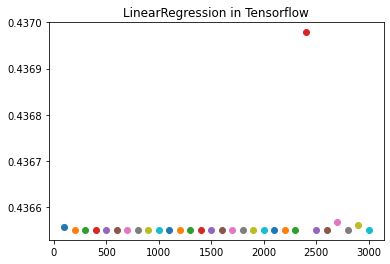

In [123]:
# optimizing algorithm (Gradient Descent)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.07)

cost_list = []
plt.figure()

for i in range(3000):
  optimizer.minimize(cost, var_list = [a, b])

  if i % 100 == 99:
    cost_list.append(cost().numpy())    
    print(f'Epoch: {i+1}, a: {a.numpy()}, b: {b.numpy()}, Error cost: {cost().numpy()}')
    plt.scatter(i, cost().numpy())

plt.title('LinearRegression in Tensorflow')
plt.show()

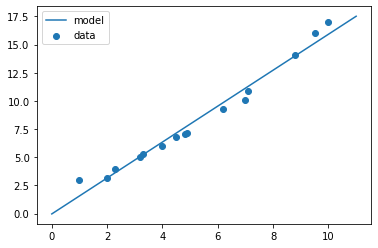

In [129]:
x = np.linspace(0, 11, 100)
y = a * x + b

plt.figure()
plt.scatter(x_data, y_data, label = 'data')
plt.plot(x, y, label = 'model')
plt.legend()
plt.show()

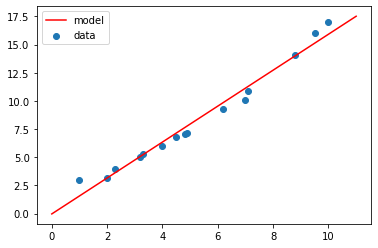

In [139]:
import seaborn as sns

x = np.linspace(0, 11, 100)
y = a * x + b

plt.figure()
plt.scatter(x_data, y_data, label = 'data')
plt.plot(x, y, 'r-', label = 'model')
plt.legend()
plt.show()

In [143]:
df = pd.read_excel('/content/drive/MyDrive/EDRC_Python/excel_linear_data_1.xlsx').to_numpy()
x = df[:, 0].reshape(-1, 1)
y = df[:, 1].reshape(-1, 1)

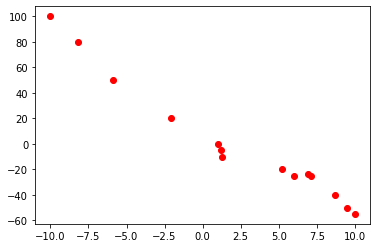

In [145]:
plt.figure()
plt.scatter(x, y, color = 'red')
plt.show()